Importing libraries nad packages

In [113]:
import pandas as pd
# from dataloader 
# import dataloader
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
import random
%matplotlib inline
# Make results reproducible
random.seed(100)


Descriptive Analysis

Provide data set splits for training, validation, and testing:


In [114]:
# dataloader = Dataloader('C:\Users\HP\Desktop\Kittu ML\hour.csv') 
data = pd.read_csv(r'C:\Users\HP\Desktop\Kittu ML\hour.csv')
# train, val, test = dataloader.getData()
# fullData = dataloader.getFullData()

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features 
target = ['cnt']



In [115]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [116]:
from sklearn.model_selection import train_test_split
# train,test = train_test_split(data, test_size=0.33, random_state=42)

In [117]:
 train, val, test = np.split(df.sample(frac=1, random_state=42),[int(.6*len(df)), int(.8*len(df))])

In [118]:
train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12830,12831,2012-06-23,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,185,240,425
8688,8689,2012-01-02,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,5,83,88
7091,7092,2011-10-28,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,1,3,4
12230,12231,2012-05-29,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,69,457,526
431,432,2011-01-20,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,6948,2011-10-22,4,0,10,2,0,6,0,1,0.40,0.4091,0.62,0.2537,6,25,31
4657,4658,2011-07-17,3,0,7,23,0,0,0,1,0.70,0.6667,0.74,0.1343,39,54,93
6414,6415,2011-09-29,4,0,9,20,0,4,1,1,0.60,0.6212,0.53,0.0896,39,234,273
15609,15610,2012-10-17,4,1,10,14,0,3,1,2,0.56,0.5303,0.43,0.1642,82,188,270


In [119]:
test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3321,3322,2011-05-23,2,0,5,7,0,1,1,2,0.56,0.5303,0.94,0.1045,13,223,236
14062,14063,2012-08-14,3,1,8,3,0,2,1,2,0.68,0.6364,0.83,0.1940,0,3,3
6246,6247,2011-09-22,3,0,9,20,0,4,1,2,0.62,0.5455,0.94,0.1343,35,250,285
11564,11565,2012-05-02,2,1,5,1,0,3,1,1,0.56,0.5303,0.83,0.0000,8,7,15
6048,6049,2011-09-14,3,0,9,14,0,3,1,1,0.78,0.7121,0.52,0.2239,19,105,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11285,2012-04-20,2,1,4,9,0,5,1,1,0.46,0.4545,0.88,0.0896,30,329,359
11964,11965,2012-05-18,2,1,5,17,0,5,1,1,0.66,0.6212,0.34,0.1343,124,688,812
5390,5391,2011-08-17,3,0,8,12,0,3,1,1,0.80,0.7273,0.43,0.2836,26,163,189
860,861,2011-02-08,1,0,2,7,0,2,1,1,0.24,0.1970,0.65,0.4179,3,97,100


Get column names of the pandas data frame:

In [120]:
print(list(data.columns))


['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Print the first two samples of the dataset to explore the data:

In [121]:
print(data.head(2))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  


In [122]:
fullData = data

Get data statistics for each column:

In [123]:
print(fullData[number_features].describe())


               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [124]:
for col in category_features:
    fullData[col] = fullData[col].astype('category') 
print(fullData[category_features].describe())


        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      5     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


Missing Value Analysis

Check any NULL values in data:


In [125]:
print(fullData.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


Outlier Analysis


Box plots


[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

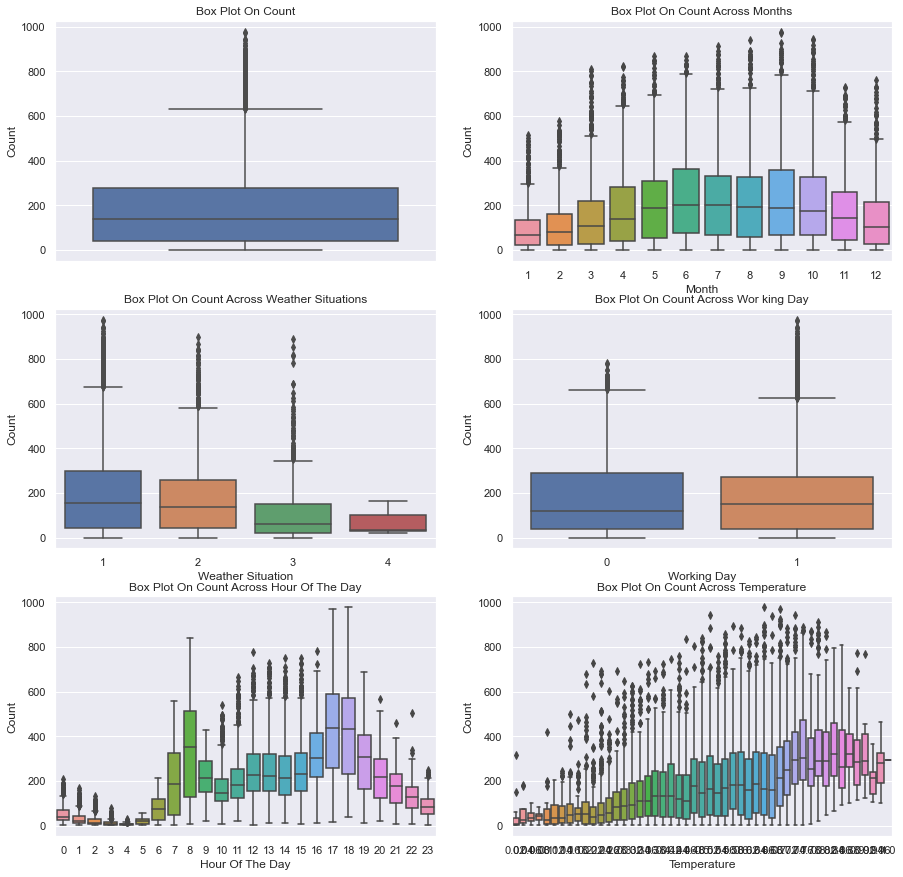

In [126]:
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train,y="cnt",orient="v",ax=axes[0][0]) 
sns.boxplot(data=train,y="cnt",x="mnth",orient="v",ax=axes[0][1]) 
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0]) 
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1]) 
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0]) 
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count") 
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months") 
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Wor king Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")


Remove outliers from data

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

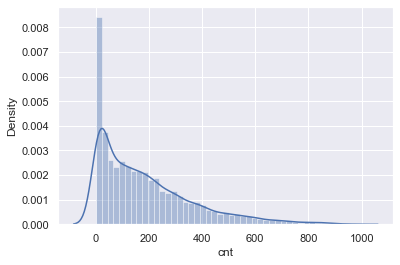

In [127]:
sns.distplot(train[target[-1]])

Samples in train set with outliars:10427
Samples in train set without outliers:10125


C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


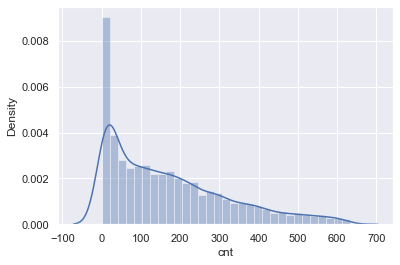

In [128]:
print("Samples in train set with outliars:{}".format(len(train))) 
q1 = train.cnt.quantile(0.25) 
q3 = train.cnt.quantile(0.75) 
iqr = q3 - q1 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print("Samples in train set without outliers:{}".format(len(train_preprocessed))) 
sns.distplot(train_preprocessed.cnt);


Correlation Analysis

<AxesSubplot:>

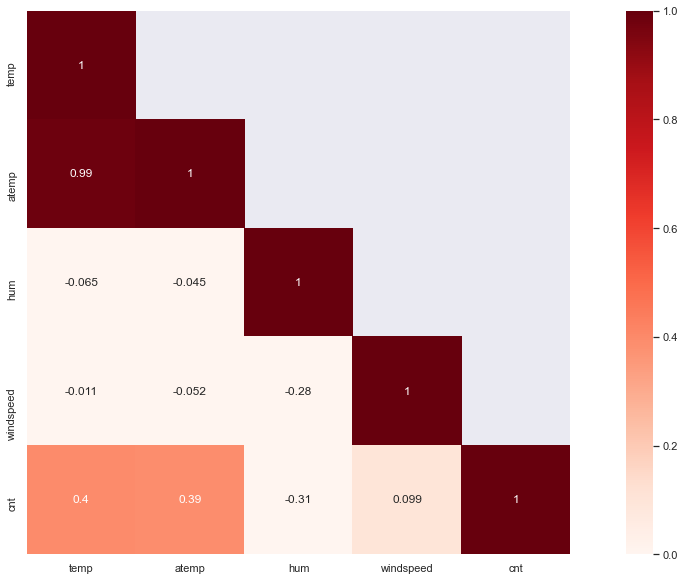

In [129]:
matrix=train[number_features+target].corr() 
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False 
fig,ax= plt.subplots() 
fig.set_size_inches(20,10) 
sns.set(font_scale=1.0) 
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")


In [130]:
features.remove('atemp')

In [131]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
# Sort validation set for plots

val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values

table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R? score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=None),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=None, n_estimators=300)
          ]

for model in models:
    model.fit(x_train, y_train)
    y_res = model. predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)


+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R? score |
+-----------------------+--------------------+----------+
|      SGDRegressor     |      28375.79      |   0.18   |
|         Lasso         |      23139.53      |   0.33   |
|       ElasticNet      |      27747.25      |   0.20   |
|         Ridge         |      23114.58      |   0.33   |
|          SVR          |      26233.71      |   0.24   |
|          SVR          |      19323.25      |   0.44   |
|         NuSVR         |      19334.33      |   0.44   |
| RandomForestRegressor |      5841.47       |   0.83   |
+-----------------------+--------------------+----------+


Random Forest Model

In [132]:
# Table setup
table= PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]

# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None, max_features='auto',	max_leaf_nodes=None,
min_impurity_decrease=0.0,	min_impurity_split=None, min_samples_leaf=1, min_samples_split=4,
min_weight_fraction_leaf=0.0,	n_estimators=200,	n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y_train)

def evaluate(x, y, dataset): 
    pred = model.predict(x)
    mse=mean_squared_error(y, pred)
    mae=mean_absolute_error(y,pred) 
    score = model.score(x, y)
    rmsle = np.sqrt(mean_squared_log_error(y, pred))
    table.add_row([type(model) , dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])

evaluate(x_train, y_train, 'training') 
evaluate(x_val, y_val, 'validation') 
print(table)


+----------------------------------------------------------+------------+---------+-------+-------+----------+
|                          Model                           |  Dataset   |   MSE   |  MAE  | RMSLE | R² score |
+----------------------------------------------------------+------------+---------+-------+-------+----------+
| <class 'sklearn.ensemble._forest.RandomForestRegressor'> |  training  |  688.08 | 17.27 |  0.22 |   0.97   |
| <class 'sklearn.ensemble._forest.RandomForestRegressor'> | validation | 5880.36 | 47.35 |  0.42 |   0.83   |
+----------------------------------------------------------+------------+---------+-------+-------+----------+


Feature importance

In [133]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0) 
indices = np.argsort(importances)[::-1]


In [134]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature hr (0.612987)
2. feature temp (0.153037)
3. feature hum (0.061663)
4. feature workingday (0.044289)
5. feature windspeed (0.031500)
6. feature weathersit (0.024915)
7. feature mnth (0.023815)
8. feature weekday (0.022891)
9. feature season (0.021279)
10. feature holiday (0.003622)


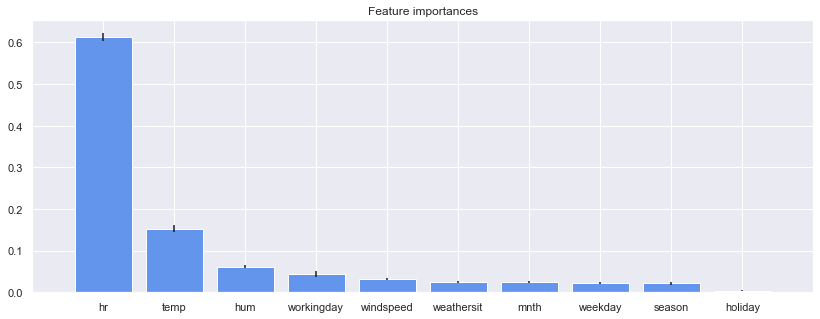

In [135]:
# Plot the feature importances of the forest 
plt.figure(figsize=(14,5)) 
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]),
        importances[indices],
        color="cornflowerblue",
        yerr=std[indices],
        align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices]) 
plt.xlim([-1, x_val.shape[1]])
plt.show()
